Desafio 35: Frequência em Academia

📂 Dataset: Registro de presença e tempo de treino de alunos de uma academia.
Colunas: Aluno, Data, Dia_Semana, Check-in, Tempo_Treino_Min

🎯 Tarefas:

Identifique e corrija os dados inválidos nas colunas Check-in e Tempo_Treino_Min.

Qual o tempo médio de treino dos alunos que fizeram check-in?

Em qual dia da semana há maior frequência de check-ins?

Quais alunos têm maior média de tempo de treino por sessão?

Crie um gráfico de barras com a média de tempo de treino por dia da semana.

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dia_35_frequencia_academia.csv")
df.head()

,Aluno,Data,Dia_Semana,Check-in,Tempo_Treino_Min
0,Aluno_70,2024-02-07,Quarta,Não,45.0
1,Aluno_46,2024-02-28,Segunda,Sim,93.0
2,Aluno_47,2024-02-11,Quarta,Sim,59.0
3,Aluno_9,2024-03-01,Sábado,Sim,31.0
4,Aluno_47,2024-03-22,Quinta,Sim,32.0


In [17]:
#Identifique e corrija os dados inválidos nas colunas Check-in e Tempo_Treino_Min.
df["Check-in"] = df["Check-in"].replace("Talvez", "Sim")

df["Tempo_Treino_Min"] = pd.to_numeric(df["Tempo_Treino_Min"], errors="coerce")
df["Tempo_Treino_Min"] = df["Tempo_Treino_Min"].fillna(df["Tempo_Treino_Min"].mean().round(1))

In [20]:
#Qual o tempo médio de treino dos alunos que fizeram check-in?
treinoSimCheckin = df[df["Check-in"] == "Sim"]["Tempo_Treino_Min"].mean()
print(f"Tempo médio de treino dos alunos que fizeram check-in: {treinoSimCheckin:.2f} minutos")

Tempo médio de treino dos alunos que fizeram check-in: 67.16 minutos


In [24]:
#Em qual dia da semana há maior frequência de check-ins?
checkins = df[df["Check-in"] == "Sim"]
diaSemanaMaisCheckin = checkins["Dia_Semana"].value_counts()
print(diaSemanaMaisCheckin)

Dia_Semana
Sábado     80
Sexta      79
Quinta     78
Terça      77
Quarta     66
Segunda    64
Name: count, dtype: int64


In [29]:
#Quais alunos têm maior média de tempo de treino por sessão?
checkins = df[df["Check-in"] == "Sim"]
tempoTreinoAlunos = checkins.groupby("Aluno")["Tempo_Treino_Min"].mean().sort_values(ascending=False).round(2)
print(tempoTreinoAlunos.head())

Aluno
Aluno_61    107.00
Aluno_63    103.00
Aluno_83    100.67
Aluno_60    100.50
Aluno_4      93.50
Name: Tempo_Treino_Min, dtype: float64


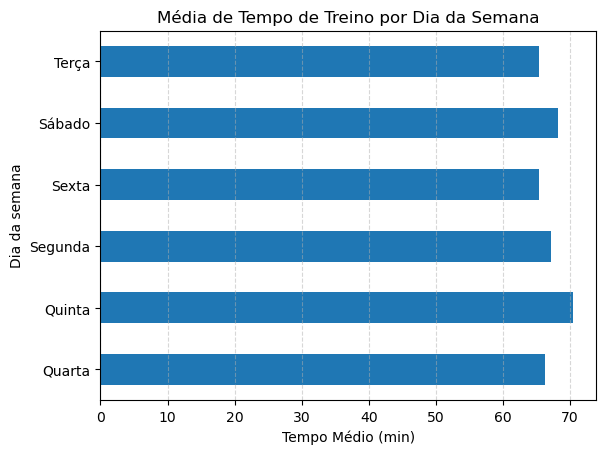

In [41]:
#Crie um gráfico de barras com a média de tempo de treino por dia da semana.
checkin_df = df[df["Check-in"] == "Sim"]
mediaTempoTreinoDia = checkin_df.groupby("Dia_Semana")["Tempo_Treino_Min"].mean()

mediaTempoTreinoDia.plot(kind='barh')
plt.title("Média de Tempo de Treino por Dia da Semana")
plt.xlabel("Tempo Médio (min)")
plt.ylabel("Dia da semana")
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.show()